In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
X= data.drop(['Total Claim Amount'], axis=1)
Y= data['Total Claim Amount']

In [5]:
numerical = data._get_numeric_data()
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


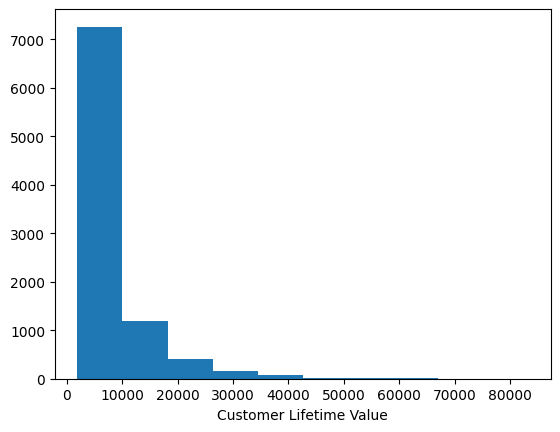

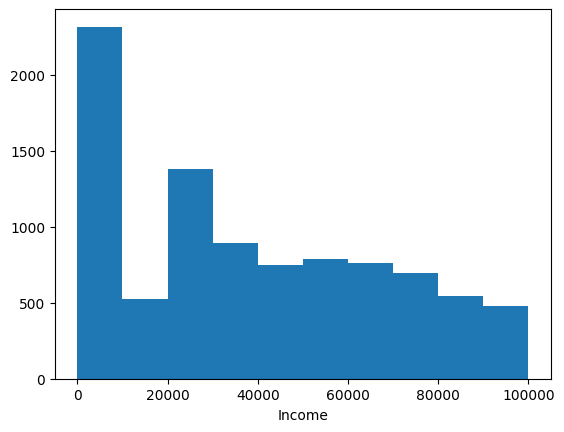

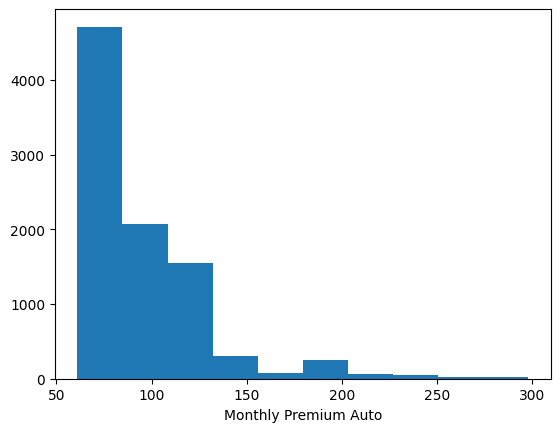

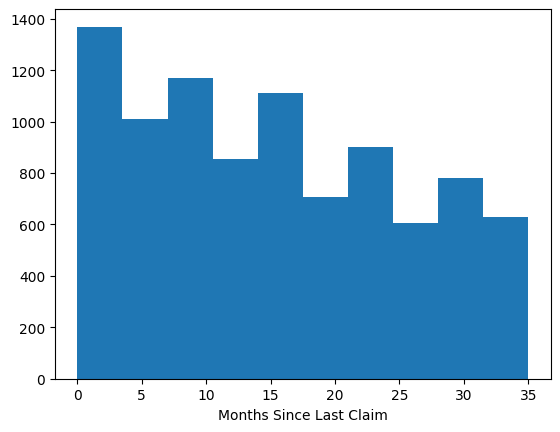

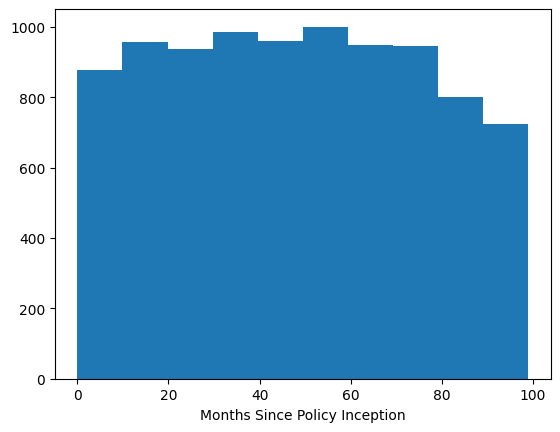

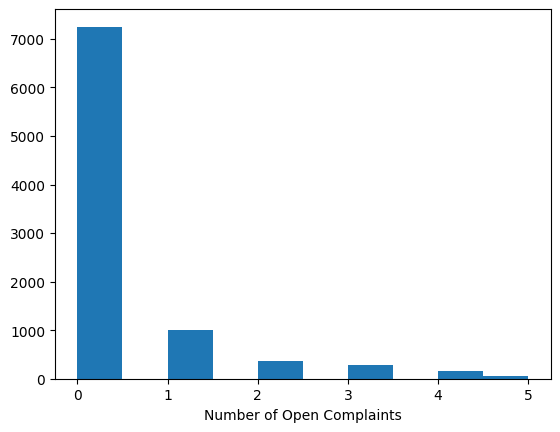

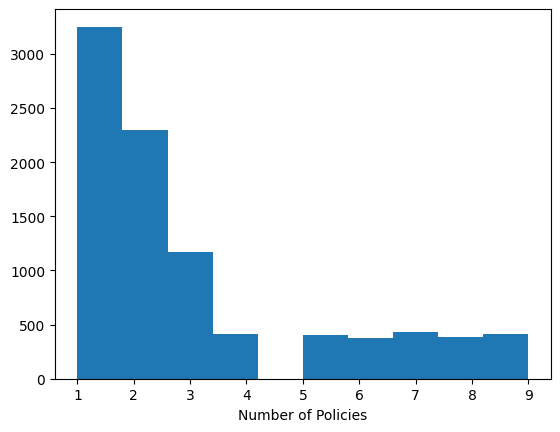

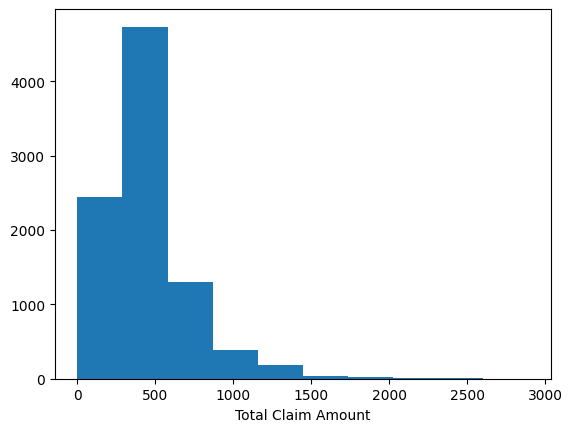

In [6]:
import matplotlib.pyplot as plt

for i in range(len(numerical.columns)):
    plt.hist(numerical[numerical.columns[i]])
    plt.xlabel(numerical.columns[i])
    plt.show()

In [7]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
from sklearn.preprocessing import StandardScaler

for i in range(len(numerical.columns)):
    temp_mean = np.mean(data[numerical.columns[i]])
    temp_std = np.std(data[numerical.columns[i]])
    data.loc[abs((data[numerical.columns[i]] - temp_mean) / temp_std) > 1.5, numerical.columns[i]] = temp_mean
    data.loc[data[numerical.columns[i]] <= 0, numerical.columns[i]] = temp_mean
    data[numerical.columns[i]] = StandardScaler().fit(data[numerical.columns[i]].values.reshape(-1, 1)).transform(data[numerical.columns[i]].values.reshape(-1, 1))




In [9]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,-1.122235,No,Basic,Bachelor,2/24/11,Employed,F,0.852310,...,0.026919,-0.352791,-0.971713,Corporate Auto,Corporate L3,Offer1,Agent,0.013330,Two-Door Car,Medsize
1,QZ44356,Arizona,0.118956,No,Extended,Bachelor,1/31/11,Unemployed,F,-0.276503,...,-0.252788,-0.352791,0.511044,Personal Auto,Personal L3,Offer3,Agent,0.270462,Four-Door Car,Medsize
2,AI49188,Nevada,1.858235,No,Premium,Bachelor,2/19/11,Employed,F,0.397126,...,-0.437273,-0.352791,-0.217578,Personal Auto,Personal L3,Offer1,Agent,0.961242,Two-Door Car,Medsize
3,WW63253,California,0.315122,No,Basic,Bachelor,1/20/11,Unemployed,M,-0.276503,...,0.808001,-0.352791,0.511044,Corporate Auto,Corporate L2,Offer1,Call Center,0.770310,SUV,Medsize
4,HB64268,Washington,-1.107464,No,Basic,Bachelor,2/3/11,Employed,M,0.098136,...,-0.160545,-0.352791,-0.971713,Personal Auto,Personal L1,Offer1,Agent,-1.273853,Four-Door Car,Medsize


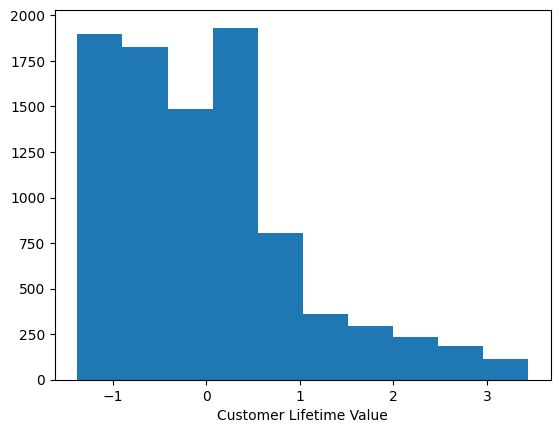

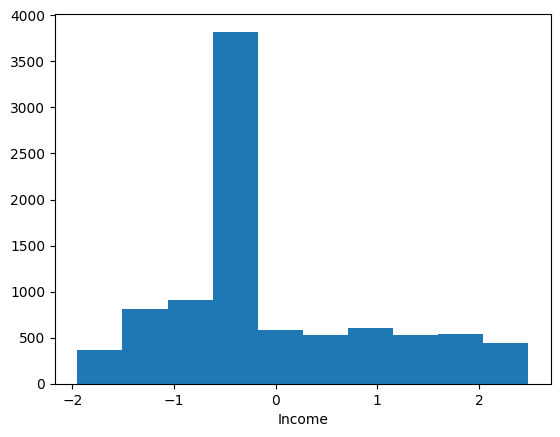

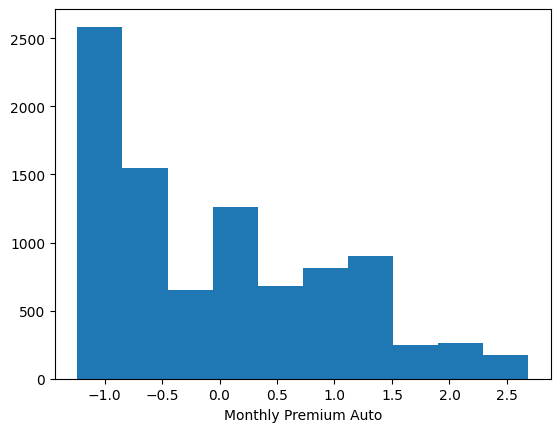

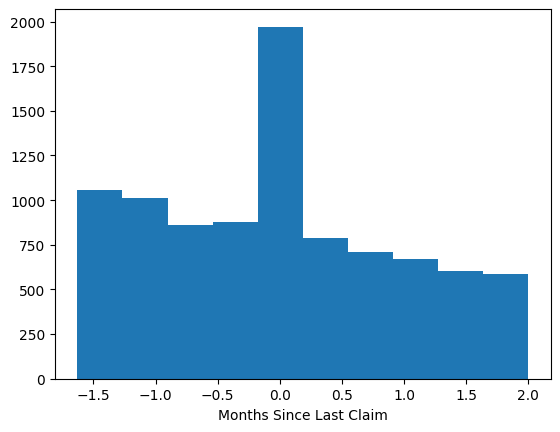

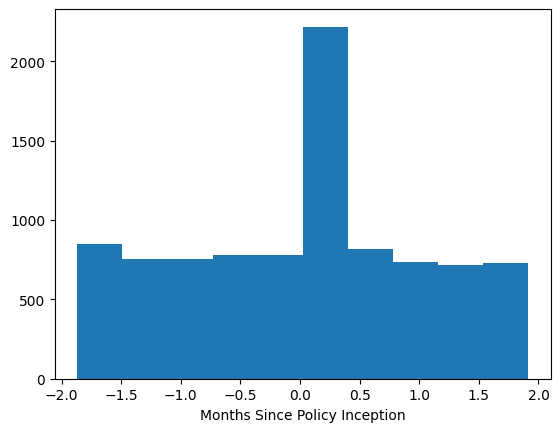

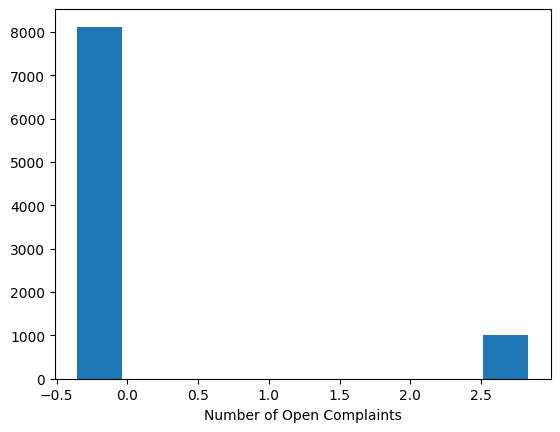

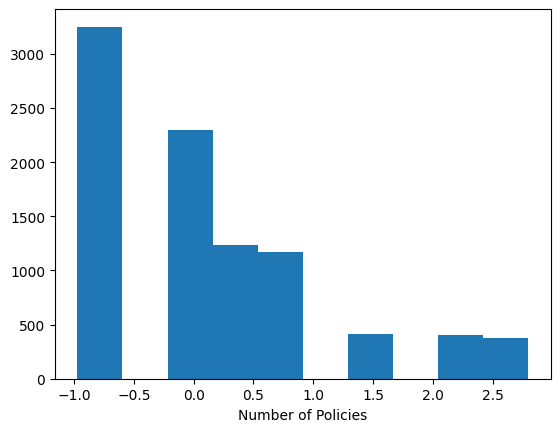

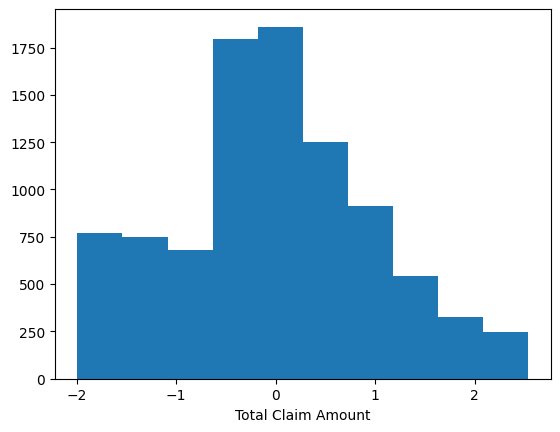

In [10]:
for i in range(len(numerical.columns)):
    plt.hist(data[numerical.columns[i]])
    plt.xlabel(numerical.columns[i])
    plt.show()